In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading clean dataset
df = pd.read_csv("C:/Users/keonyango/Sendy Case Study/CleanF_data.csv")
df.head()

,dispatch_day,dispatch_day_of_week,client_type,order_license_status,order_carrier_type,vendor_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,...,target,Active Rider Age,Average Partner Rating,Number of Ratings,dispatch_hour,cat_hour,pickup_to_dropoff_distance,rider_to_dropoff_distance,rider_to_pickup_distance,RF_@rider
0,27,6,Business,0,2,Bike,0,1,1080,-42.698343,...,1,11,10.00,1,9,day,14.426076,16.076117,1.746491,10.00
1,30,7,Personal,0,1,Bike,0,1,730,-42.787317,...,2,68,24.13,229,13,day,13.126454,13.417651,0.394373,5525.77
2,14,2,Personal,0,2,Bike,1,1,490,-42.749180,...,1,273,24.92,123,10,day,5.421337,7.224872,1.846564,3065.16
3,22,3,Personal,0,2,Bike,1,1,510,-42.836266,...,2,168,23.76,175,14,day,4.609312,4.626603,0.557483,4158.00
4,27,5,Business,0,2,Bike,0,0,400,-42.828195,...,0,95,24.53,42,16,day,1.554900,1.693870,0.954647,1030.26


In [3]:
#Split dependent and independent features
features_cols = df.drop(["target","vendor_type"],1)
cols = features_cols.columns
target=df["target"]

In [4]:
df[cols].shape , target.shape

((179867, 23), (179867,))

In [6]:
#Modeling
#Set seed for reproducibility of our final model

SEED = 420 #you can set any number

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[cols], target, test_size = 0.2, random_state = SEED)

In [10]:
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix

In [11]:
#Selecting categorical features
#Cat_features = [0]
X = df[cols]
categorical_features_indices = np.where(X.dtypes != np.float)[0]

#Training set
train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=categorical_features_indices)

#Evaluation set
eval_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=categorical_features_indices)

#Initialize CatBoostClassifier
cat_model = CatBoostClassifier(iterations=1000, eval_metric= "Accuracy", early_stopping_rounds = 100,loss_function='MultiClass')

#Model Fiting
cat_model.fit(train_dataset)

#Get predicted classes
preds_class = cat_model.predict(eval_dataset)

#Check score
accuracy_score(y_test, preds_class)

Learning rate set to 0.101949
0:	learn: 0.5596659	total: 885ms	remaining: 14m 44s
1:	learn: 0.5702432	total: 1.58s	remaining: 13m 8s
2:	learn: 0.5844829	total: 2.16s	remaining: 11m 59s
3:	learn: 0.5990910	total: 2.77s	remaining: 11m 29s
4:	learn: 0.6007867	total: 3.25s	remaining: 10m 47s
5:	learn: 0.6028160	total: 3.78s	remaining: 10m 26s
6:	learn: 0.6034901	total: 4.3s	remaining: 10m 10s
7:	learn: 0.6039071	total: 4.85s	remaining: 10m 1s
8:	learn: 0.6045534	total: 5.56s	remaining: 10m 12s
9:	learn: 0.6062421	total: 6.21s	remaining: 10m 15s
10:	learn: 0.6070274	total: 6.88s	remaining: 10m 19s
11:	learn: 0.6078475	total: 7.46s	remaining: 10m 14s
12:	learn: 0.6086189	total: 7.91s	remaining: 10m
13:	learn: 0.6091957	total: 8.54s	remaining: 10m 1s
14:	learn: 0.6100853	total: 9.08s	remaining: 9m 56s
15:	learn: 0.6104119	total: 9.66s	remaining: 9m 54s
16:	learn: 0.6108358	total: 10.3s	remaining: 9m 55s
17:	learn: 0.6112111	total: 10.9s	remaining: 9m 54s
18:	learn: 0.6113987	total: 11.5s	rema

0.6541946961694557

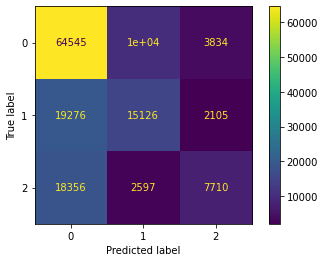

In [12]:
#Confunsion matrix plot to Visualize the predictions on training data
plot_confusion_matrix(cat_model,X_train,y_train)
plt.show()

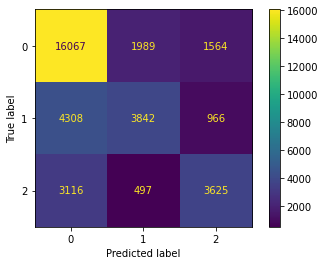

In [13]:
#Confunsion matrix plot to Visualize the predictions on test data
plot_confusion_matrix(cat_model,X_test,y_test)
plt.show()

In [14]:
#Create dataframe for y_test and predictions
pp = pd.DataFrame({'True Label':y_test,'Predictions':preds_class[:,0]})
pp.head(14)

,True Label,Predictions
61161,1,0
114762,1,0
97475,0,0
45824,0,0
169902,0,0
111638,0,0
41649,0,2
50332,1,0
29860,0,0
33344,0,0


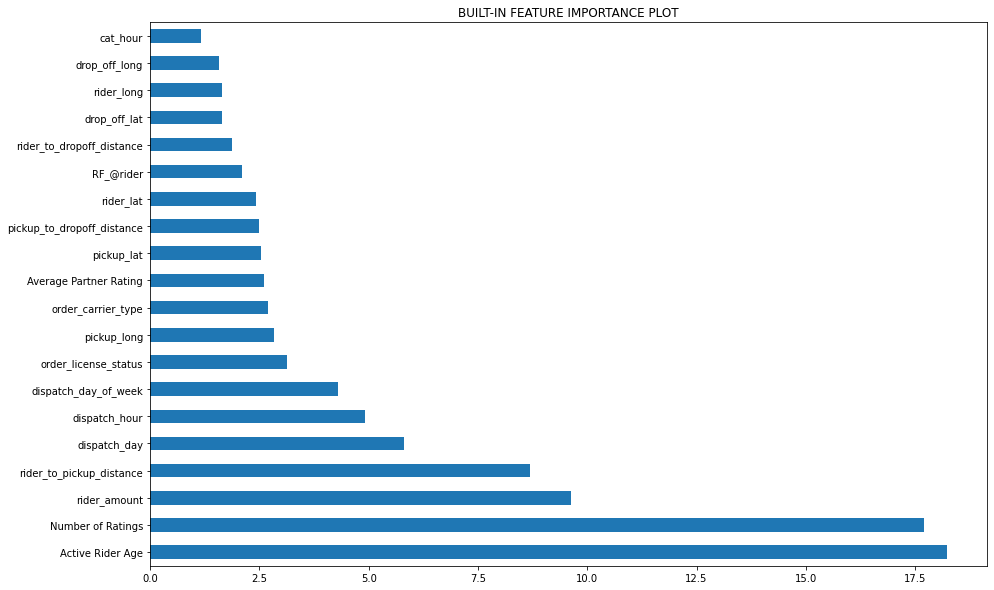

In [15]:
#Visualize on the best contributed features
feat_importances = pd.Series(cat_model.feature_importances_, index=cols)
plt.figure(figsize=(15,10))
plt.title("BUILT-IN FEATURE IMPORTANCE PLOT")
feat_importances.nlargest(20).plot(kind='barh')
plt.show()